In [1]:
from fromscratchtoml.models import svm
import matplotlib.pyplot as plt
import torch as ch

In [2]:
X = ch.Tensor([[8.0, 7], [4, 10], [9, 7], [7, 10],
               [9, 6], [4, 8], [10, 10], [2, 7], [8, 3], [7, 5], [4, 4],
               [4, 6], [1, 3], [2, 5]])
y = ch.Tensor([1, 1, 1, 1, 1, 1, 1,
              -1, -1 ,-1, -1, -1, -1, -1])

In [3]:
s = svm.SVC()

In [4]:
s.fit(X, y)

In [5]:
s.predict()

INFO:fromscratchtoml.models.svm.svc:1
INFO:fromscratchtoml.models.svm.svc:1
INFO:fromscratchtoml.models.svm.svc:1
INFO:fromscratchtoml.models.svm.svc:1
INFO:fromscratchtoml.models.svm.svc:1
INFO:fromscratchtoml.models.svm.svc:1
INFO:fromscratchtoml.models.svm.svc:1
INFO:fromscratchtoml.models.svm.svc:-1
INFO:fromscratchtoml.models.svm.svc:-1
INFO:fromscratchtoml.models.svm.svc:-1
INFO:fromscratchtoml.models.svm.svc:-1
INFO:fromscratchtoml.models.svm.svc:-1
INFO:fromscratchtoml.models.svm.svc:-1
INFO:fromscratchtoml.models.svm.svc:-1


## Visualizations

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [7]:
for i in range(7):
    ax.scatter(X[i][0], X[i][1], marker='x', color='g')
for i in range(7):
    ax.scatter(X[7+i][0], X[7+i][1], marker='o', color='m')

In [8]:
c = 0
X1 = X.min(dim=0)[0][0]
Y1 = -(s.w[0] * X1 + s.b - c) / s.w[1]
X2 = X.max(dim=0)[0][0]
Y2 = -(s.w[0] * X2 + s.b - c) / s.w[1]
ax.plot([X1, X2], [Y1, Y2], 'r--')

In [9]:
c = 1
X1 = X.min(dim=0)[0][0]
Y1 = -(s.w[0] * X1 + s.b - c) / s.w[1]
X2 = X.max(dim=0)[0][0]
Y2 = -(s.w[0] * X2 + s.b - c) / s.w[1]
ax.plot([X1, X2], [Y1, Y2], 'k')

In [10]:
c = -1
X1 = X.min(dim=0)[0][0]
Y1 = -(s.w[0] * X1 + s.b - c) / s.w[1]
X2 = X.max(dim=0)[0][0]
Y2 = -(s.w[0] * X2 + s.b - c) / s.w[1]
ax.plot([X1, X2], [Y1, Y2], 'k')

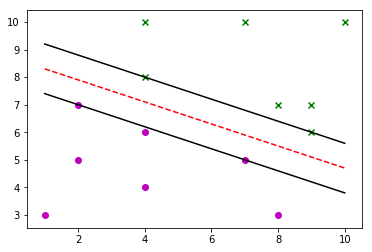

In [11]:
plt.show()